In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\sutharsan\Downloads\iNeubytes customerSegment T3\data.csv',encoding = 'latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.isnull().any()  # 2 missing values

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [10]:
# 1.here all UK based
df1 = df[df['Country'] == 'United Kingdom']
# df1 = df
df1.shape

(495478, 8)

In [11]:
# 3.dtype-->Date want in Datetime type
df1['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\sutharsan\AppData\Local\Temp\ipykernel_7532\1185731252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [12]:
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [14]:
df1.duplicated().sum()

5178

In [15]:
df1.drop_duplicates(inplace=True)
df1.shape

C:\Users\sutharsan\AppData\Local\Temp\ipykernel_7532\1445003006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


(490300, 8)

In [16]:
df1.dropna(inplace=True)
df1.shape

C:\Users\sutharsan\AppData\Local\Temp\ipykernel_7532\136572652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


(356728, 8)

In [17]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
df1.to_csv(r'C:\Users\sutharsan\Downloads\cleaned_customer_segment.csv')

### My Tableau

In [19]:
# https://public.tableau.com/app/profile/aarthy8395/viz/Customer_Segmentation_16895163561520/Dashboard1?publish=yes

In [20]:
# new features
df1['cost'] = df1['UnitPrice'] * df1['Quantity']

C:\Users\sutharsan\AppData\Local\Temp\ipykernel_7532\488761954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cost'] = df1['UnitPrice'] * df1['Quantity']


In [21]:
df1.insert(loc = 7,column = 'month',value=df1.InvoiceDate.dt.month)
df1.insert(loc = 6,column = 'year',value=df1.InvoiceDate.dt.year)
df1.insert(loc = 5,column = 'days',value=df1.InvoiceDate.dt.dayofweek)

In [22]:
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,days,UnitPrice,year,CustomerID,month,Country,cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,2.55,2010,17850.0,12,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2,3.39,2010,17850.0,12,United Kingdom,20.34


In [23]:
df1['CustomerID'] = df1['CustomerID'].astype('int64')  # from float to int

C:\Users\sutharsan\AppData\Local\Temp\ipykernel_7532\1905920259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CustomerID'] = df1['CustomerID'].astype('int64')  # from float to int


In [24]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,days,UnitPrice,year,CustomerID,month,Country,cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,2.55,2010,17850,12,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2,2.75,2010,17850,12,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34


In [25]:
df1.CustomerID.nunique()   # 3921 customers

3950

In [26]:
high_price = df1.groupby('StockCode')['UnitPrice'].sum().sort_values(ascending = False)

In [27]:
high_price.head(5)

StockCode
M        89404.88
22423    19499.65
POST     18157.01
DOT      11906.36
CRUK      7933.43
Name: UnitPrice, dtype: float64

<AxesSubplot:xlabel='StockCode'>

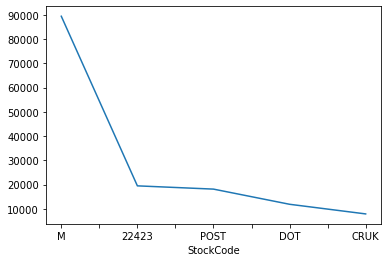

In [28]:
high_price[:5].plot()

In [29]:
high_Quantity = df1.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False)

In [30]:
high_Quantity.head(5)    

StockCode
84077     47886
22197     45194
85099B    40777
84879     32580
85123A    32136
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='StockCode'>

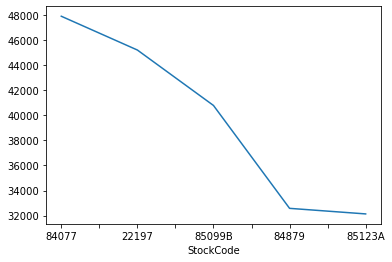

In [31]:
high_Quantity[:5].plot()

In [32]:
top_5 = df1.groupby('CustomerID')['cost'].count().sort_values(ascending = False)

In [33]:
top_5.head()  # top 5 customer in cost 

CustomerID
17841    7812
14096    5128
12748    4459
14606    2759
15311    2478
Name: cost, dtype: int64

<AxesSubplot:xlabel='CustomerID'>

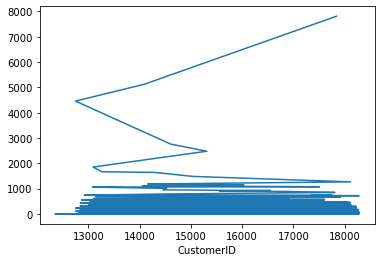

In [34]:
top_5.plot()

In [35]:
top5_cost_sales =  df1.groupby('cost')['Description'].count().sort_values(ascending = False)

In [36]:
top5_cost_sales.head()

cost
15.00    16941
17.70     7496
16.50     7242
1.25      6942
3.75      6541
Name: Description, dtype: int64

(2.0, 30.0)

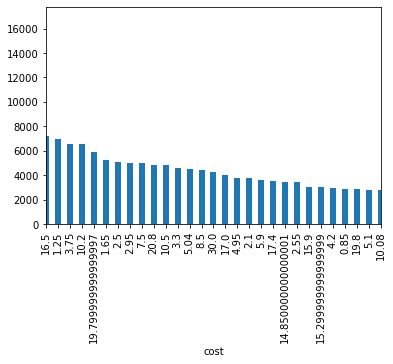

In [37]:
top5_cost_sales.plot(kind='bar')
plt.xlim(2,30)

In [38]:
top5_product = df1.groupby('Description')['cost'].sum().sort_values(ascending = False)

In [39]:
top5_product.head()

Description
REGENCY CAKESTAND 3 TIER              102871.15
WHITE HANGING HEART T-LIGHT HOLDER     88260.85
JUMBO BAG RED RETROSPOT                75236.43
PARTY BUNTING                          61893.48
ASSORTED COLOUR BIRD ORNAMENT          52147.56
Name: cost, dtype: float64

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'PARTY BUNTING'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(4.5, 0, '')])

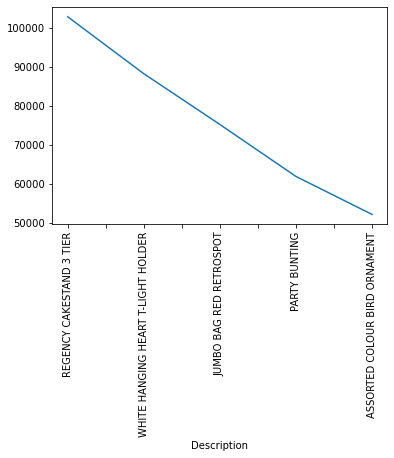

In [40]:
top5_product[:5].plot()
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='month'>

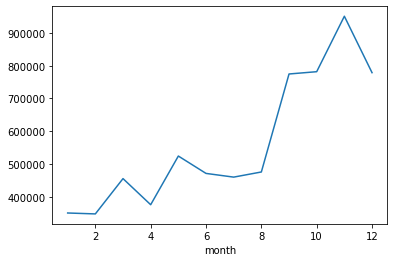

In [41]:
df1.groupby('month')['cost'].sum().plot()  # november and december is high

In [42]:
df1.year.unique()

array([2010, 2011], dtype=int64)

<AxesSubplot:xlabel='year'>

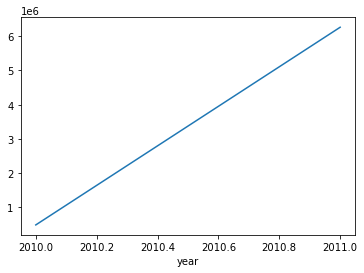

In [43]:
df1.groupby('year')['cost'].sum().plot()

In [44]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'days', 'UnitPrice', 'year', 'CustomerID', 'month', 'Country', 'cost'],
      dtype='object')

In [45]:
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
days                    int64
UnitPrice             float64
year                    int64
CustomerID              int64
month                   int64
Country                object
cost                  float64
dtype: object

In [46]:
x=df1[['Quantity','UnitPrice', 'year', 'month','days']]
y = df1['cost']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
train_score = lr.score(x_train,y_train)
lr_pred = lr.predict(x_test)
print('Linear Regression Training score',train_score)

Linear Regression Training score 0.8193700533863892


In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
mse = mean_squared_error
mae = mean_absolute_error

In [51]:
print('Linear Regression testing score',explained_variance_score(lr_pred,y_test))

Linear Regression testing score -0.1678486213721493


In [52]:
lr_mae = mae(y_test,lr_pred)
lr_mse = mse(y_test,lr_pred)
lr_rmse = np.sqrt(lr_mse)

In [53]:
lr_mae,lr_mse,lr_rmse

(15.482884128458046, 151817.39555723697, 389.6375181591693)

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
RF_score = RF.score(x_train,y_train)
RF_pred = RF.predict(x_test)
print('RF Regressor',RF_score)   

RF Regressor 0.8802956578381518


In [55]:
print('RF on testing',explained_variance_score(RF_pred,y_test))  # 80% on testing

RF on testing -4.171134281951247


In [56]:
RF_mae = mae(y_test,RF_pred)
RF_mse = mse(y_test,RF_pred)
RF_rmse = np.sqrt(RF_mse)

In [57]:
print('Random Forest Regressor')
RF_mae,RF_mse,RF_rmse

Random Forest Regressor


(2.9319470337977833, 272732.06367444753, 522.237554829646)

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_score = dt.score(x_train,y_train)
dt_pred = dt.predict(x_test)
print('DT Regressor',dt_score)   # it may overfit


DT Regressor 1.0


In [59]:
print('RF on testing',explained_variance_score(dt_pred,y_test))

RF on testing -0.428777352809534


In [60]:
dt_mae = mae(y_test,dt_pred)
dt_mse = mse(y_test,dt_pred)
dt_rmse = np.sqrt(dt_mse)

In [61]:
print('decision tree Regressor')
dt_mae,dt_mse,dt_rmse

decision tree Regressor


(2.481078406638201, 168370.7885989488, 410.3300971156622)

In [62]:
from tabulate import tabulate

tab = pd.DataFrame({'MAE' :[lr_mae,RF_mae,dt_mae],
                   'MSE': [lr_mse,RF_mse,dt_mse],
                   'RMSE' : [lr_rmse,RF_rmse,dt_rmse],
                   'train_score' : [train_score,RF_score,dt_score]},
                   index= ['LR','RF','DT']
                  )

print(tabulate(tab,headers = 'keys',tablefmt='psql'))

+----+----------+--------+---------+---------------+
|    |      MAE |    MSE |    RMSE |   train_score |
|----+----------+--------+---------+---------------|
| LR | 15.4829  | 151817 | 389.638 |      0.81937  |
| RF |  2.93195 | 272732 | 522.238 |      0.880296 |
| DT |  2.48108 | 168371 | 410.33  |      1        |
+----+----------+--------+---------+---------------+


In [63]:
# RMSE is very less in DecisionTree

### K-mean cluster

In [64]:
from sklearn.cluster import KMeans

In [65]:
# choosing k value with elbow method
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['CustomerID','cost']])
    sse.append(km.inertia_)

In [66]:
sse

[980612725650.8506,
 296413297594.4005,
 176794353208.06393,
 131799068081.78333,
 102880595719.23055,
 72928190915.68744,
 50781571162.60529,
 41200371349.26521,
 34513563071.90685]

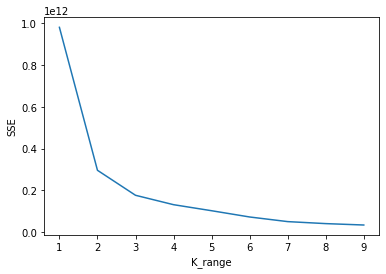

In [67]:
plt.xlabel('K_range')
plt.ylabel('SSE')
plt.plot(k_rng,sse)  # k = 2 

In [68]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df1[['CustomerID','cost']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [69]:
df1['cluster']=y_predicted
df1.sample(5)

C:\Users\sutharsan\AppData\Local\Temp\ipykernel_7532\2631157097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster']=y_predicted


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,days,UnitPrice,year,CustomerID,month,Country,cost,cluster
260422,559811,22667,RECIPE BOX RETROSPOT,6,2011-07-12 15:22:00,1,2.95,2011,13269,7,United Kingdom,17.70,1
157292,550199,20728,LUNCH BAG CARS BLUE,10,2011-04-15 10:20:00,4,1.65,2011,16523,4,United Kingdom,16.50,0
433969,574016,21990,MODERN FLORAL STATIONERY SET,3,2011-11-02 12:04:00,2,1.25,2011,18105,11,United Kingdom,3.75,0
418531,572732,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,2,2011-10-25 15:21:00,1,2.95,2011,18079,10,United Kingdom,5.90,0
374756,569403,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-10-04 09:02:00,1,1.69,2011,13319,10,United Kingdom,27.04,1


In [70]:
km.cluster_centers_

array([[16984.24275335,    19.98039772],
       [14212.27518031,    17.92825871]])

In [71]:
df_1 = df1[df1.cluster==0]
df_2 = df1[df1.cluster==1]

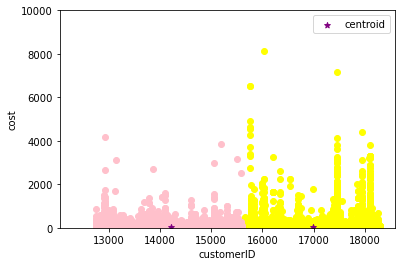

In [72]:
plt.scatter(df_1['CustomerID'],df_1['cost'],color='yellow')
plt.scatter(df_2['CustomerID'],df_2['cost'],color='pink')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('customerID')
plt.ylabel('cost')
plt.ylim(0,10000)
plt.legend()

(0.0, 2000.0)

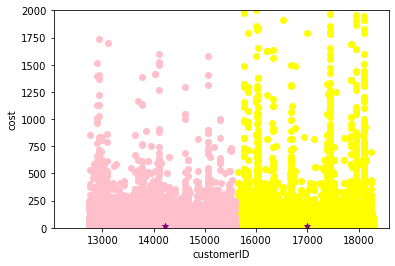

In [73]:
# without limit.
plt.scatter(df_1['CustomerID'],df_1['cost'],color='yellow')
plt.scatter(df_2['CustomerID'],df_2['cost'],color='pink')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('customerID')                 
plt.ylabel('cost')
plt.ylim(0,2000)

In [74]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'days', 'UnitPrice', 'year', 'CustomerID', 'month', 'Country', 'cost',
       'cluster'],
      dtype='object')

In [75]:
transcation = df1.groupby('days').agg({'cost' : 'sum','InvoiceNo':'count'}) \
             .rename(columns ={'cost':'total amount','InvoiceNo' :'No-of-orders'})


In [76]:
transcation

,total amount,No-of-orders
days,,
0,1053585.571,58288
1,1287234.101,59909
2,1231920.850,61475
3,1513828.940,71236
4,980266.011,47277
6,680320.681,58543


<AxesSubplot:xlabel='days', ylabel='total amount'>

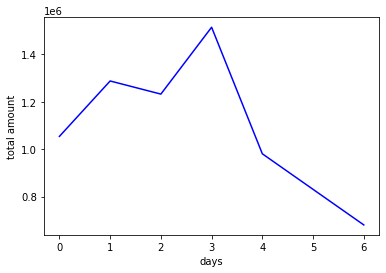

In [77]:
sns.lineplot(x= 'days',y='total amount',data = transcation,color='blue')


<AxesSubplot:xlabel='days', ylabel='No-of-orders'>

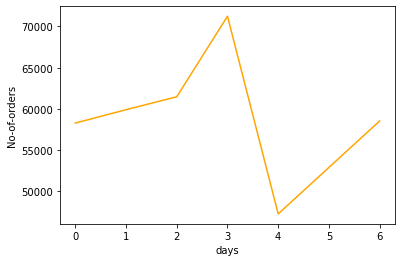

In [78]:
sns.lineplot(x= 'days',y='No-of-orders',data = transcation,color='orange')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


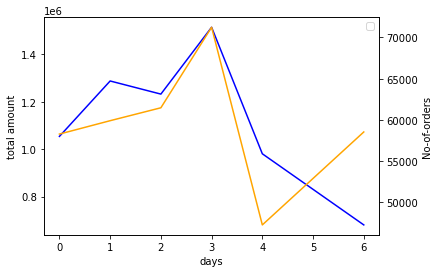

In [79]:
ax1 = sns.lineplot(x= 'days',y='total amount',data = transcation,color='blue')
ax2 = ax1.twinx()
sns.lineplot(x= 'days',y='No-of-orders',data = transcation,color='orange',ax=ax2)
plt.legend()

In [80]:
transcation_month = df1.groupby('month').agg({'cost' : 'sum','InvoiceNo':'count'}) \
             .rename(columns ={'cost':'total amount','InvoiceNo' :'No-of-orders'})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


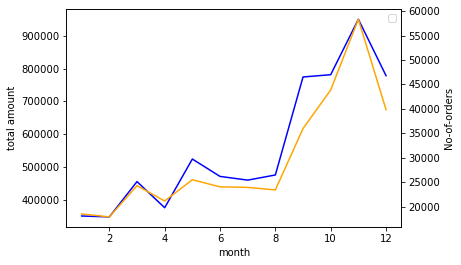

In [81]:
ax1 = sns.lineplot(x= 'month',y='total amount',data = transcation_month,color='blue')
ax2 = ax1.twinx()
sns.lineplot(x= 'month',y='No-of-orders',data = transcation_month,color='orange',ax=ax2)
plt.legend()

In [82]:
transcation_year = df1.groupby('year').agg({'cost' : 'sum','InvoiceNo':'count'}) \
             .rename(columns ={'cost':'total amount','InvoiceNo' :'No-of-orders'})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


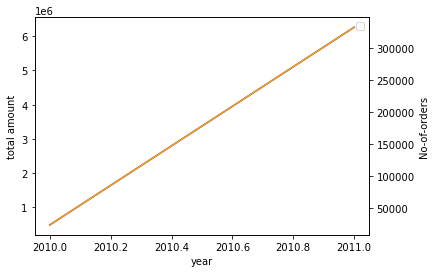

In [83]:
ax1 = sns.lineplot(x= 'year',y='total amount',data = transcation_year,color='blue')
ax2 = ax1.twinx()
sns.lineplot(x= 'year',y='No-of-orders',data = transcation_year,color='orange',ax=ax2)
plt.legend()